

### <b>Problem Statement</b>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### <b> Business Goal</b>
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Link to Dataset : - https://drive.google.com/drive/folders/1RvsvcsPx-Z7iPs2sNY2t0Seg3RFmgfUT

In [2]:
# Importing the dataset
dataset = pd.read_csv('C:\\Users\Mokshda Sharma\Desktop\My Projects\Car_prices\Copy_of_CarPrice_project.csv')

### Data Inspection

In [354]:
# First look
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dataset['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

### <b>DataSet Information:</b>

Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric)

In [355]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [356]:
dataset.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [357]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [358]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Exploratory Data Analysis

<Axes: xlabel='price', ylabel='Density'>

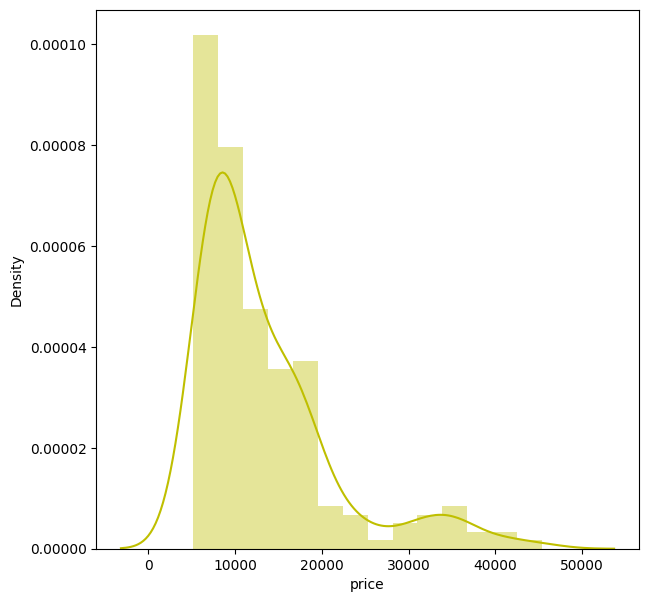

In [359]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(dataset['price'],color="y")

<Axes: xlabel='price', ylabel='Density'>

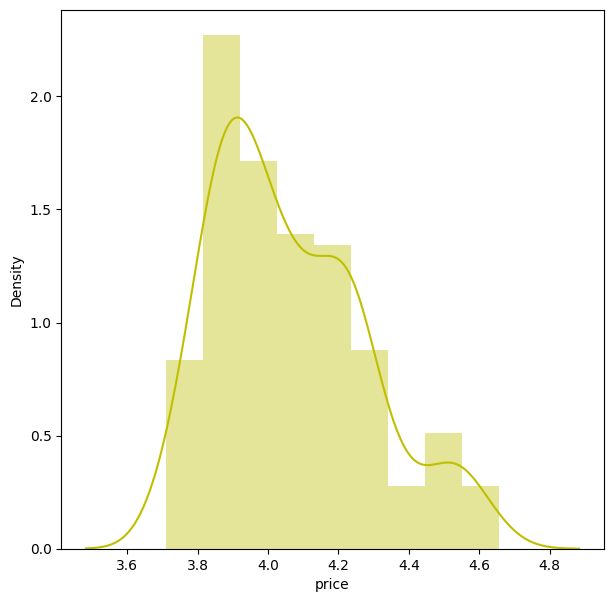

In [360]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['price']),color="y")

In [361]:
numeric_features = dataset.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [362]:
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

# for col in numeric_features[1:]:
#     fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
#     feature = dataset[col]
#     feature.hist(bins=50, ax = ax)
#     ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
#     ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
#     ax.set_title(col)
# plt.show()

In [363]:
# for col in numeric_features[2:]:
#     fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
#     feature = np.log(dataset[col])
#     feature.hist(bins=50, ax = ax)
#     ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
#     ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
#     ax.set_title(col)
# plt.show()

In [443]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg']

# for feature in numerical_features:
#     plt.figure(figsize=(5, 4))
#     sns.histplot(data=dataset[feature], bins=20, kde=True)
#     plt.title(feature)
#     plt.show()

In [445]:
# for col in numeric_features[1:-1]:
#     fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
#     feature = dataset[col]
#     label = dataset['price']
#     correlation = feature.corr(label)
#     plt.scatter(x=feature, y=label)
#     plt.xlabel(col)
#     plt.ylabel('Price')
#     ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
#     z = np.polyfit(dataset[col], dataset['price'], 1)
#     y_hat = np.poly1d(z)(dataset[col])

#     plt.plot(dataset[col], y_hat, "r--", lw=1)

# plt.show()

<Axes: >

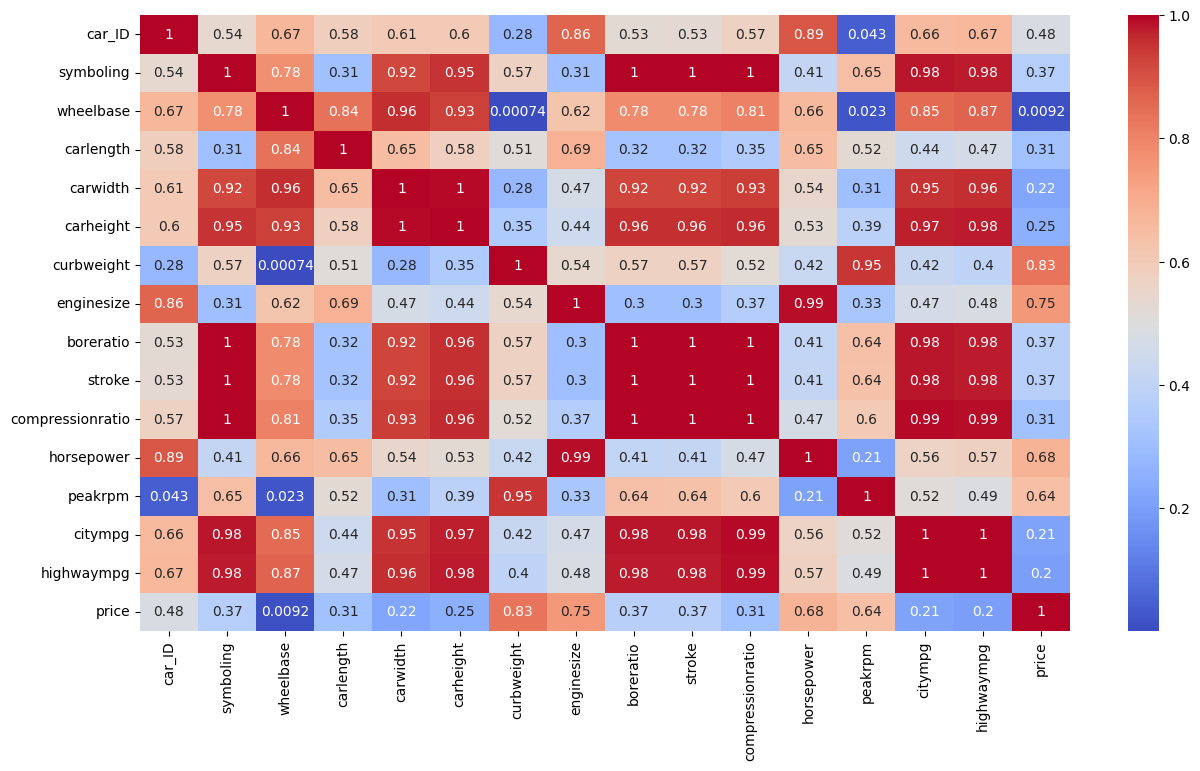

In [366]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.describe().corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [367]:
### removing multicollear
dataset['mileage'] = 0.6*dataset['citympg'] + 0.4*dataset['highwaympg']
dataset['car_area'] = dataset['carlength']*dataset['carwidth']

In [368]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [369]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price']]])

,variables,VIF
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


In [370]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price',"carlength","carwidth","citympg","highwaympg","wheelbase","carheight","car_area"]]])

,variables,VIF
0,symboling,1.814953
1,curbweight,198.427552
2,enginesize,65.617706
3,boreratio,187.712520
4,stroke,112.853620
5,compressionratio,15.189976
6,horsepower,48.625774
7,peakrpm,137.896263
8,mileage,65.810022


In [371]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])

,variables,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,mileage,8.201171


In [372]:
numerical_features = ['enginesize','compressionratio','mileage']

In [373]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [374]:
dataset['company'] = dataset['CarName'].str.split(" ", expand=True)[0]
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})
dataset['company'] = dataset['company'].str.title()
dataset['company'].value_counts()

company
Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Subaru         12
Volkswagen     12
Volvo          11
Peugeot        11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Alfa-Romero     3
Chevrolet       3
Jaguar          3
Renault         2
Mercury         1
Name: count, dtype: int64

In [375]:
categorical_features = dataset.describe(include=['object','category']).columns

In [446]:

# for col in categorical_features:
#     counts = dataset[col].value_counts().sort_index()
#     fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
#     counts.plot.bar(ax = ax, color='steelblue')
#     ax.set_title(col + 'counts')
#     ax.set_xlabel(col)
#     ax.set_ylabel("Frequency")
# plt.show()

In [377]:
dataset["enginelocation"].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [447]:
# for col in categorical_features:
#     fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
#     dataset.boxplot(column = 'price', by = col, ax = ax)
#     ax.set_title('Label by ' + col)
#     ax.set_ylabel("Price")
# plt.show()

In [449]:
# plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['company'])['price'].mean().sort_values(ascending = False))
# df_autox.plot.bar()
# plt.title('Car Company Name vs Average Price')
# plt.show()

In [380]:
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,26.4,11690.92,Audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,19.6,11726.24,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114,5400,23,28,16845.0,25.0,13008.32,Volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160,5300,19,25,19045.0,21.4,12989.44,Volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134,5500,18,23,21485.0,20.0,13008.32,Volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106,4800,26,27,22470.0,26.4,13008.32,Volvo


In [381]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'mileage', 'car_area', 'company'],
      dtype='object')

In [382]:
df_autox.rename(columns={'price':'price_mean'},inplace=True)

In [383]:
dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [384]:
dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [385]:
dataset["company_cat"].value_counts()

company_cat
0    142
1     39
2     24
Name: count, dtype: int64

In [386]:
correlation.price

car_ID              0.482682
symboling          -0.368061
wheelbase          -0.009232
carlength           0.311619
carwidth           -0.220038
carheight          -0.253888
curbweight          0.833244
enginesize          0.750994
boreratio          -0.374828
stroke             -0.373144
compressionratio   -0.309251
horsepower          0.683246
peakrpm             0.641603
citympg            -0.211738
highwaympg         -0.200571
price               1.000000
Name: price, dtype: float64

In [387]:
dataset_pr = dataset.copy()

In [388]:
dataset.fuelsystem.value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

## outliers

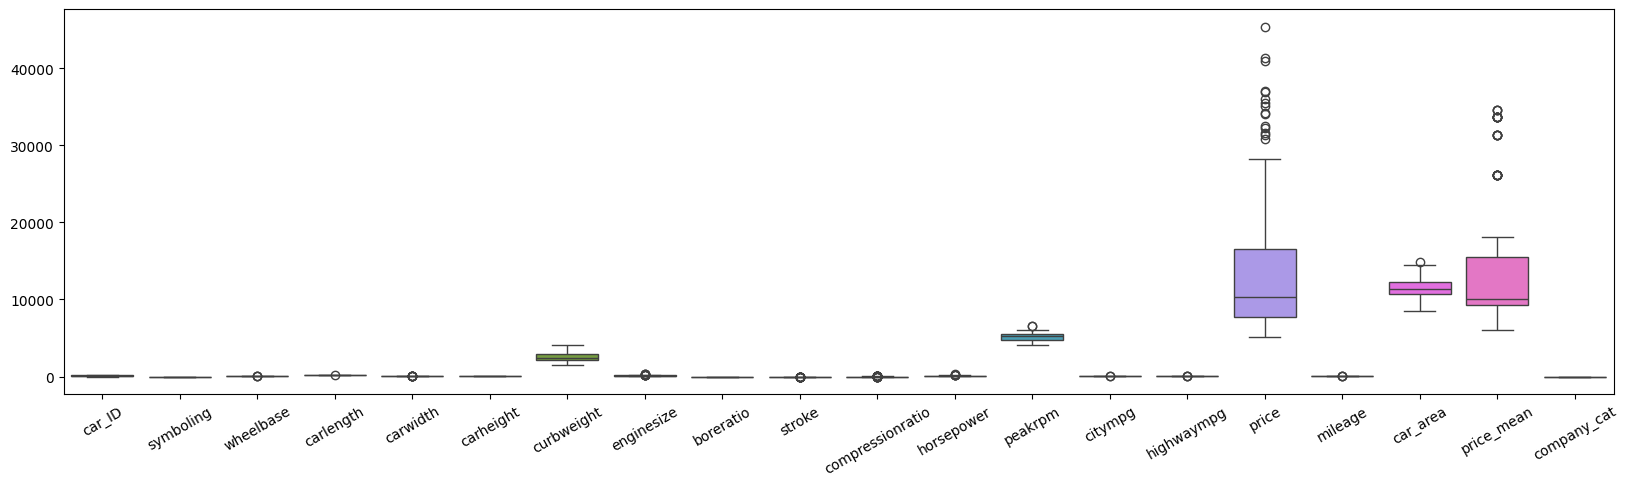

In [389]:
plt.figure(figsize=(20, 5))
#to check the outliers
sns.boxplot(data=dataset_pr)
# Rotate x labels to prevent overlapping
plt.xticks(rotation=30)
plt.show()

In [390]:
# a=dataset[['curbweight','peakrpm','price', 'price_mean','car_area']].quantile(0.25)
# b=dataset[['curbweight','peakrpm','price', 'price_mean','car_area']].quantile(0.75)
# IQR=b-a
# outliers = ((dataset[['curbweight','peakrpm','price', 'price_mean','car_area']] < (a - 1.5 * IQR)) | dataset[['curbweight','peakrpm','price', 'price_mean','car_area']] > (b + 1.5 * IQR))
# outliers

In [391]:

# Assuming 'dataset' is your DataFrame
a = dataset_pr[['curbweight', 'peakrpm', 'price', 'price_mean', 'car_area']].quantile(0.25)
b = dataset_pr[['curbweight', 'peakrpm', 'price', 'price_mean', 'car_area']].quantile(0.75)
IQR = b - a

# Calculate lower and upper bounds
lower_bound = a - 1.5 * IQR
upper_bound = b + 1.5 * IQR

# Create a boolean DataFrame indicating outliers
outliers = (dataset_pr[['curbweight', 'peakrpm', 'price', 'price_mean', 'car_area']] < lower_bound) | (dataset_pr[['curbweight', 'peakrpm', 'price', 'price_mean', 'car_area']] > upper_bound)

# Any row that has a True value in any column is an outlier
outliers = outliers.any(axis=1)

# Filter out the outliers
dataset_pr = dataset_pr[~outliers]

dataset_pr.head()  # Display the first few rows of the cleaned dataset


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean,company_cat
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero,15498.333333,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero,15498.333333,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950.0,26.4,11690.92,Audi,17859.166714,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450.0,19.6,11726.24,Audi,17859.166714,1


In [392]:
dataset_pr.shape

(179, 31)

## encoding

In [393]:
### Data encoding
#label encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }

dataset_pr = dataset_pr.replace(encoders_nums)


In [394]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

In [395]:
dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,...,True,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,0,0,4,0,front,99.8,176.6,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,0,0,4,0,front,99.4,176.6,...,False,False,False,False,False,False,False,True,False,False


In [396]:
dataset_pr.shape

(179, 47)

In [397]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])

In [398]:
features

['enginesize',
 'compressionratio',
 'mileage',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [399]:
len(features)

24

## z score

In [400]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

In [401]:
y = np.log10(dataset_pr['price'])

## Splitting dataset

In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(143, 24)
(36, 24)


## Linear Regression

In [403]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [404]:
reg.score(X_train, y_train)

0.8738408498101702

In [405]:
reg.coef_

array([ 0.07010685,  0.02077471, -0.0286205 , -0.00469867,  0.0177191 ,
        0.01202362,  0.01666325,  0.01631617,  0.03602485,  0.01161987,
       -0.01196915, -0.00332798,  0.00199982,  0.0019602 , -0.06950365,
       -0.07617978, -0.11287623, -0.07044376, -0.07207352, -0.00442839,
       -0.01962341, -0.00469867,  0.01518414, -0.00320865])

In [406]:
len(reg.coef_)

24

In [407]:
reg.intercept_

np.float64(4.007086554280638)

In [408]:
y_pred = reg.predict(X_test)

In [409]:
y_pred

array([3.87514789, 4.21524444, 3.91844722, 3.87817271, 3.93852574,
       4.2298149 , 4.24570399, 4.1120396 , 3.97356067, 4.03382751,
       4.01250588, 4.1797888 , 4.02877438, 4.18918841, 3.85075995,
       4.29988525, 3.97001351, 4.01787519, 3.82391649, 3.89953149,
       4.11880448, 3.93296372, 4.11451552, 4.21892132, 4.00252743,
       4.07078272, 4.08357973, 4.12804668, 4.19753136, 3.96832696,
       4.11384951, 3.85213165, 4.28567311, 3.87748236, 3.96145915,
       4.25870673])

In [410]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 4706688.224982818
RMSE : 2169.490314563035


In [411]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.780366125906604
Adjusted R2 :  0.3011649460664674


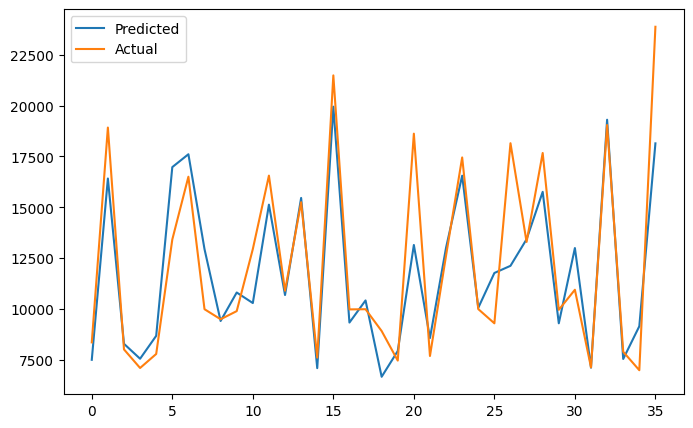

In [412]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Lasso Regressor

In [413]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [414]:
lasso.score(X_train, y_train)

0.8735992350321738

In [415]:
lasso.coef_

array([ 0.06726021,  0.01241279, -0.03073177,  0.        ,  0.01650568,
        0.01196574,  0.01728734,  0.01133129,  0.03634419,  0.00896508,
       -0.01223193, -0.00501086,  0.        ,  0.00025655, -0.05943749,
       -0.06909165, -0.09896266, -0.06242578, -0.06138638, -0.00478701,
       -0.02068491,  0.        ,  0.01419753, -0.00387608])

### Cross validation

In [416]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [417]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.00526460743586788


In [418]:
y_pred_lasso = lasso_regressor.predict(X_test)

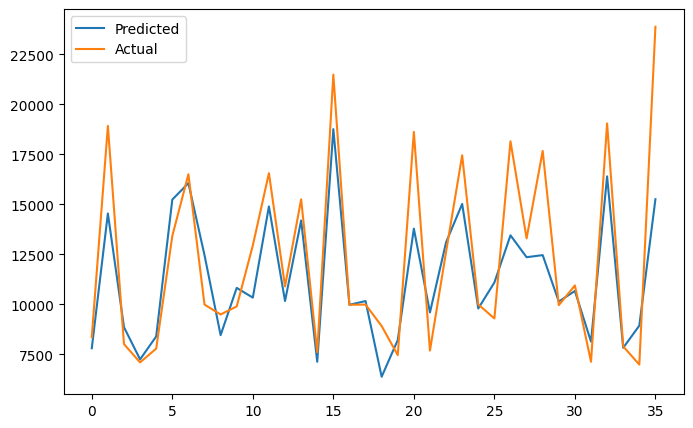

In [419]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [420]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6411402.211552279
RMSE : 2532.074685224012
R2 : 0.7008169993882835
Adjusted R2 :  0.04805408896272012


## Ridge

In [421]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [422]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 30}

Using  {'alpha': 30}  the negative mean squared error is:  -0.0048864879951351


In [423]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [424]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 5160651.920835935
RMSE : 2271.7068298607405
R2 : 0.7591822699866934
Adjusted R2 :  0.2337617681394789


## Elastic net

In [425]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [426]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [427]:
elasticnet.score(X_train, y_train)

0.6528938877013994

In [428]:
y_pred_en = elasticnet.predict(X_test)


In [429]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 12769388.584111797
RMSE : 3573.428127738376
R2 : 0.40412660654983235
Adjusted R2 :  -0.8959607973414425


In [430]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [431]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.6}

Using  {'alpha': 0.01, 'l1_ratio': 0.6}  the negative mean squared error is:  -0.005135555580937925


In [432]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [433]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 5944511.644411292
RMSE : 2438.1369207678417
R2 : 0.7226040775071474
Adjusted R2 :  0.11737661025001445


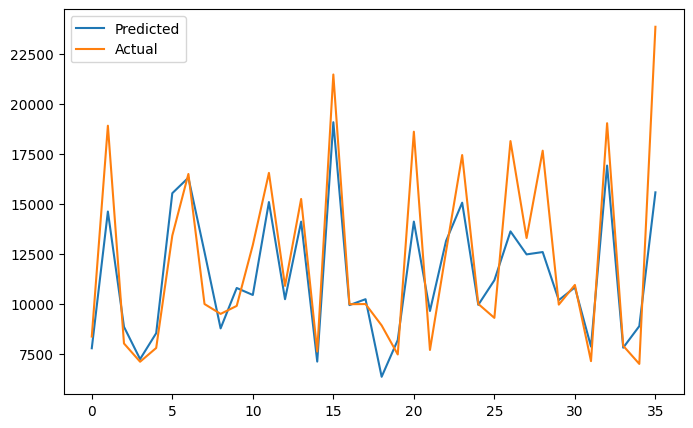

In [434]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Decision Tree

In [435]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_de = model.predict(X_test)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred_de))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_de))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_de)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))




MSE : 10875277.207176996
RMSE : 3297.768519344103
R2 : 0.4925138121166691
Adjusted R2 :  -0.6147287796287799


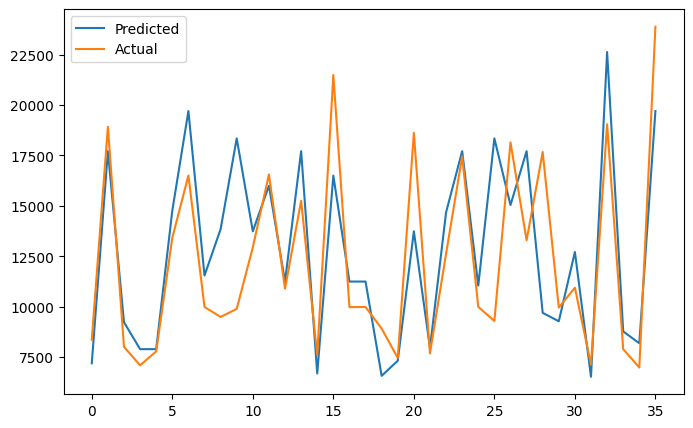

In [436]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_de))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Random Forest

In [437]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)



MSE  = mean_squared_error(10**(y_test), 10**(y_pred_rf))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_rf))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))



MSE : 5263414.192328163
RMSE : 2294.2131967906043
R2 : 0.7543869500675462
Adjusted R2 :  0.2185039320331016


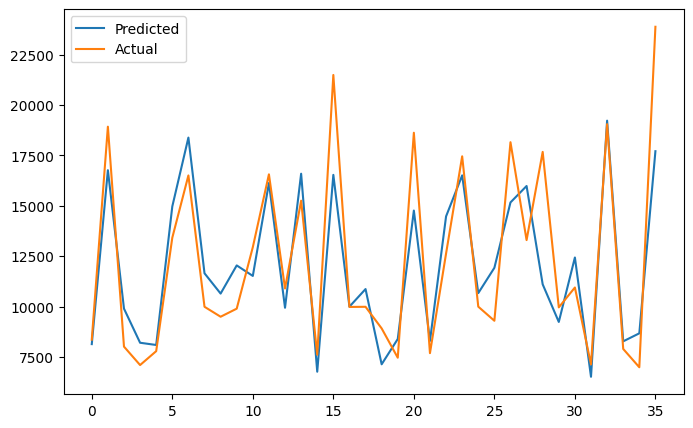

In [438]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_rf))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Gradient Boosting

In [439]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = model.predict(X_test)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred_gb))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_gb))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 5299918.407768939
RMSE : 2302.1551658758667
R2 : 0.7526835097981354
Adjusted R2 :  0.21308389481224888


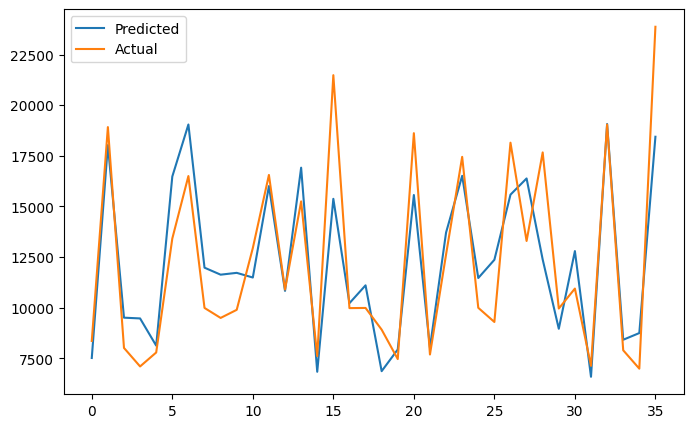

In [440]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_gb))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## SVR

In [441]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svr = model.predict(X_test)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred_svr))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_svr))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_svr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 12083262.208534501
RMSE : 3476.0987052347205
R2 : 0.43614414983766125
Adjusted R2 :  -0.7940867959710778


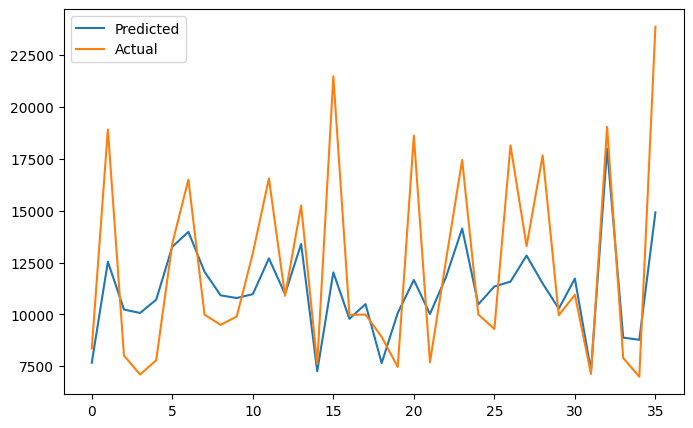

In [442]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_svr))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()